In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

### Data Collection

In [96]:
# now = datetime.now()

# ticker = 'AAPL'
# start = datetime(now.year - 10,now.month,now.day)
# end = now

# df = yf.download(ticker, start, end,auto_adjust = True)
# df.columns = df.columns.droplevel(1)
#df = df.reset_index()
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end=now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\Rohan\AppData\Local\Temp\ipykernel_20188\1605143225.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-12-28   24.084593   24.280751   23.940293   24.258203  106816800
2015-12-29   24.517494   24.673068   24.093613   24.116160  123724800
2015-12-30   24.197321   24.508467   24.165755   24.481412  100855200
2015-12-31   23.732866   24.131946   23.633659   24.127437  163649200
2016-01-04   23.753151   23.757661   22.997830   23.135367  270597600
...                ...         ...         ...         ...        ...
2025-12-19  273.670013  274.600006  269.899994  272.149994  144632000
2025-12-22  270.970001  273.880005  270.510010  272.859985   36571800
2025-12-23  272.359985  272.500000  269.559998  270.839996   29642000
2025-12-24  273.809998  275.429993  272.200012  272.339996   17910600
2025-12-26  273.399994  275.369995  272.859985  274.160004   21455300

[2515 rows x 5 columns]

### Data Visualization

In [97]:
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(2515, 5)

In [98]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [99]:
df.describe()

Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03
mean     113.959038   115.090320   112.712610   113.850067  1.019039e+08
std       73.218600    73.916473    72.444099    73.145320  5.791655e+07
min       20.604074    20.907412    20.405652    20.526531  1.791060e+07
25%       41.467171    41.747165    41.076835    41.468715  6.197075e+07
50%      119.892632   121.646892   118.217211   120.240836  8.884460e+07
75%      171.537010   172.934288   169.628586   171.278771  1.244915e+08
max      286.190002   288.619995   283.299988   286.200012  5.334788e+08

In [100]:
df = df.reset_index()
df.head()

Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2015-12-28  24.084593  24.280751  23.940293  24.258203  106816800
1      2015-12-29  24.517494  24.673068  24.093613  24.116160  123724800
2      2015-12-30  24.197321  24.508467  24.165755  24.481412  100855200
3      2015-12-31  23.732866  24.131946  23.633659  24.127437  163649200
4      2016-01-04  23.753151  23.757661  22.997830  23.135367  270597600

Text(0, 0.5, 'Close Price')

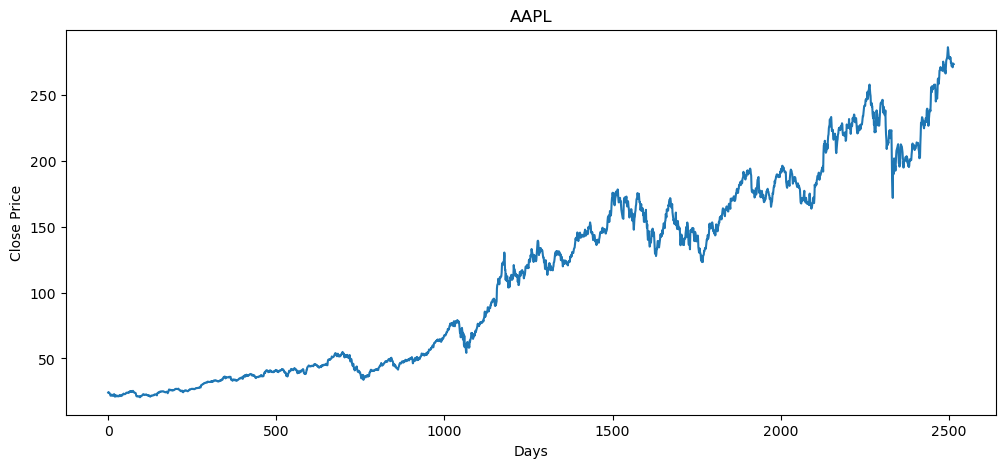

In [101]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

### Feature Engineering

In [102]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

0
0   10
1   20
2   30
3   40
4   50
5   60
6   70
7   80
8   90
9  100

In [103]:
df1['Rolling_Avg'] = df1.rolling(5).mean()
df1

0  Rolling_Avg
0   10          NaN
1   20          NaN
2   30          NaN
3   40          NaN
4   50         30.0
5   60         40.0
6   70         50.0
7   80         60.0
8   90         70.0
9  100         80.0

In [104]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)

Price        Date      Close       High        Low       Open     Volume  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2015-12-28  24.084593  24.280751  23.940293  24.258203  106816800   
1      2015-12-29  24.517494  24.673068  24.093613  24.116160  123724800   
2      2015-12-30  24.197321  24.508467  24.165755  24.481412  100855200   
3      2015-12-31  23.732866  24.131946  23.633659  24.127437  163649200   
4      2016-01-04  23.753151  23.757661  22.997830  23.135367  270597600   
..            ...        ...        ...        ...        ...        ...   
98     2016-05-18  21.566544  21.714791  21.413735  21.475316  168249600   
99     2016-05-19  21.484438  21.584790  21.340753  21.584790  121768400   
100    2016-05-20  21.717070  21.764965  21.557418  21.584787  128104000   
101    2016-05-23  21.993038  22.166374  21.819703  21.865318  152074400   
102    2016-05-24  22.328310  22.371643  22.086552  22.173221  140560800   

Price      MA_100  
Ticker             
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
98            NaN  
99      22.772533  
100     22.748858  
101     22.723614  
102     22.704924  

[103 rows x 7 columns]

In [105]:
df['MA_200'] = df.Close.rolling(200).mean()

Text(0, 0.5, 'Close Price')

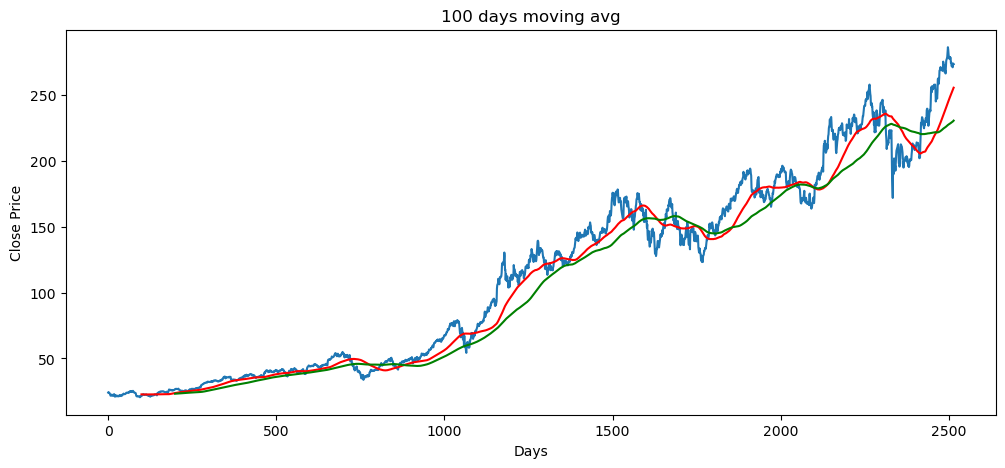

In [106]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('100 days moving avg')
plt.xlabel('Days')
plt.ylabel('Close Price')

### Calculating percentage changed in each trading session :-

In [107]:
df['Percentage_change'] = df.Close.pct_change()
df[['Close','Percentage_change']]

Price        Close Percentage_change
Ticker        AAPL                  
0        24.084593               NaN
1        24.517494          0.017974
2        24.197321         -0.013059
3        23.732866         -0.019194
4        23.753151          0.000855
...            ...               ...
2510    273.670013          0.005437
2511    270.970001         -0.009866
2512    272.359985          0.005130
2513    273.809998          0.005324
2514    273.399994         -0.001497

[2515 rows x 2 columns]

In [108]:
df

Price        Date       Close        High         Low        Open     Volume  \
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL   
0      2015-12-28   24.084593   24.280751   23.940293   24.258203  106816800   
1      2015-12-29   24.517494   24.673068   24.093613   24.116160  123724800   
2      2015-12-30   24.197321   24.508467   24.165755   24.481412  100855200   
3      2015-12-31   23.732866   24.131946   23.633659   24.127437  163649200   
4      2016-01-04   23.753151   23.757661   22.997830   23.135367  270597600   
...           ...         ...         ...         ...         ...        ...   
2510   2025-12-19  273.670013  274.600006  269.899994  272.149994  144632000   
2511   2025-12-22  270.970001  273.880005  270.510010  272.859985   36571800   
2512   2025-12-23  272.359985  272.500000  269.559998  270.839996   29642000   
2513   2025-12-24  273.809998  275.429993  272.200012  272.339996   17910600   
2514   2025-12-26  273.399994  275.369995  272.859985  274.160004   21455300   

Price       MA_100      MA_200 Percentage_change  
Ticker                                            
0              NaN         NaN               NaN  
1              NaN         NaN          0.017974  
2              NaN         NaN         -0.013059  
3              NaN         NaN         -0.019194  
4              NaN         NaN          0.000855  
...            ...         ...               ...  
2510    252.706953  229.541053          0.005437  
2511    253.345313  229.704626         -0.009866  
2512    254.049365  229.932902          0.005130  
2513    254.758237  230.201515          0.005324  
2514    255.467301  230.487312         -0.001497  

[2515 rows x 9 columns]

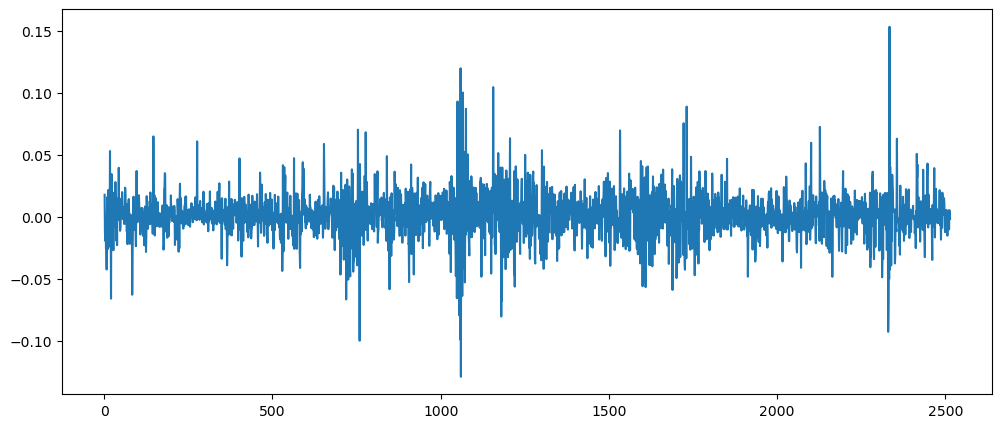

In [109]:
plt.figure(figsize = (12,5))
plt.plot(df['Percentage_change'])

## Data Preprocessing

In [110]:
df.shape

(2515, 9)

In [111]:
#Splitting data into training and testing 

# Splitting data into Training and Testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [112]:
data_training.head()

Ticker       AAPL
0       24.084593
1       24.517494
2       24.197321
3       23.732866
4       23.753151

In [113]:
# Scaling down the data between 0 and 1
# For the LSTM models, we have to scale down the data, we cannot just provide this data as it is,
# we need to kind of normalize the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))



In [114]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02207523],
       [0.02482091],
       [0.02279021],
       ...,
       [0.69639901],
       [0.69596166],
       [0.71564371]])

## Sequence Generation :-

In [115]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    print(data_training_array[i-100: i])
    
x_train, y_train = np.array(x_train), np.array(y_train)

[[0.02207523]
 [0.02482091]
 [0.02279021]
 [0.0198444 ]
 [0.01997305]
 [0.01619778]
 [0.01332339]
 [0.00724571]
 [0.00797508]
 [0.01022018]
 [0.01226517]
 [0.00858994]
 [0.01163593]
 [0.00821815]
 [0.00754604]
 [0.00773193]
 [0.00703125]
 [0.014353  ]
 [0.01152155]
 [0.01230803]
 [0.00291267]
 [0.00387082]
 [0.00851843]
 [0.00721713]
 [0.00442858]
 [0.00710271]
 [0.0082098 ]
 [0.00450031]
 [0.00592371]
 [0.00589494]
 [0.00485971]
 [0.00404021]
 [0.00445717]
 [0.00826731]
 [0.01039528]
 [0.00772096]
 [0.00740465]
 [0.0086124 ]
 [0.00546362]
 [0.00749092]
 [0.00843982]
 [0.00865554]
 [0.00833922]
 [0.01386031]
 [0.01417668]
 [0.01525503]
 [0.01742607]
 [0.01578703]
 [0.01457927]
 [0.01470868]
 [0.01478056]
 [0.01634775]
 [0.01672156]
 [0.01968342]
 [0.02168198]
 [0.02143755]
 [0.0216101 ]
 [0.0215957 ]
 [0.02276034]
 [0.02191205]
 [0.02125061]
 [0.02056049]
 [0.02414061]
 [0.0268437 ]
 [0.02602413]
 [0.02746192]
 [0.02908664]
 [0.02720311]
 [0.02885658]
 [0.02537713]
 [0.02554962]
 [0.02

## Model Building

In [116]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [117]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [118]:
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', return_sequences=True, 
#               input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))


# model.add(LSTM(units=60, activation='relu', return_sequences=True))
# model.add(Dropout(0.3))


# model.add(LSTM(units=80, activation='relu', return_sequences=True))
# model.add(Dropout(0.4))


# model.add(LSTM(units=120, activation='relu'))
# model.add(Dropout(0.5))


# model.add(Dense(units=1))

In [119]:
model = Sequential()

# Input layer defines the shape of the data the model will receive
# (100, 1) means each input sample is a sequence of 100 time steps, 
# with 1 feature at each time step (e.g., stock closing price)
model.add(Input(shape=(100, 1)))

# First LSTM layer with 128 units, tanh activation function. Tann means Hyperbolic Tangent, this helps the network handle
# both positive and negative values, which is important when you're trying to capture patterns in sequential data.
# We also set return_sequences=True because we want this layer to return the full sequence to the next LSTM layer.
# For example, if you have a sequence of 100 time steps, and you set return_sequences=True, the LSTM layer will produce 
# an output for each of those 100 steps
model.add(LSTM(units=128, activation='tanh', return_sequences=True))

# No return_sequences means this layer outputs a single value summarizing the sequence
# Now at this point, we got the single value summarizing the sequence of output that was generated in the previous layer
model.add(LSTM(units=64))

# A Dense layer is a fully connected layer, meaning that each neuron in the layer is connected to every neuron in the previous layer. 
# These layers are typically used at the end of a neural network to transform the learned features into the final output.
model.add(Dense(25))
model.add(Dense(1))

### Training the Model

In [120]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0104
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6.0928e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.7731e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.6077e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.7146e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.4399e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6.3242e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.6423e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.8871e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.8917e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.7878e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.6303e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.4839e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.0527e-04
Epoch 15/50
52/52 ━

In [121]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [122]:
#save the trained model 

model.save('stock_prediction_model.keras')

### Preparing test data

In [123]:
data_training.tail(100)

Ticker        AAPL
1660    157.152542
1661    163.163269
1662    162.848984
1663    162.622803
1664    162.150711
...            ...
1755    134.471313
1756    132.510895
1757    130.402695
1758    130.333740
1759    133.436935

[100 rows x 1 columns]

In [124]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days,data_testing], ignore_index=True)
final_df.head()

Ticker        AAPL
0       157.152542
1       163.163269
2       162.848984
3       162.622803
4       162.150711

In [125]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [126]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [127]:
x_test,y_test = np.array(x_test),np.array(y_test)

## Predicting the data

In [128]:
y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [129]:
# converting scaled data back to original
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

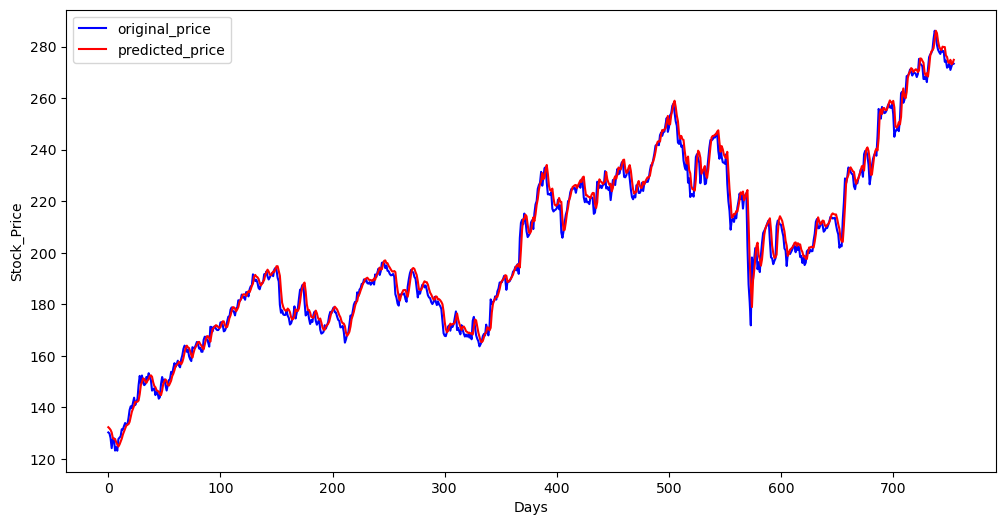

In [131]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'blue',label = 'original_price')
plt.plot(y_pred,'red',label = 'predicted_price')
plt.xlabel('Days')
plt.ylabel('Stock_Price')
plt.legend()
plt.show()


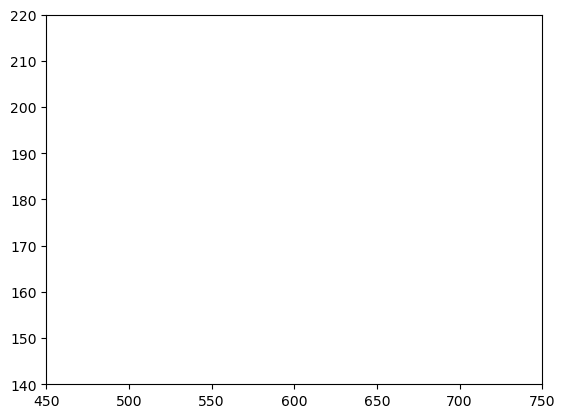

In [132]:
plt.xlim(450,750)
plt.ylim(140,220)
plt.show()

## Model Evaluation

In [134]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error = {mse}")

Mean Squared Error = 14.102188482362038


In [135]:
#Root mean squared error
rmse = np.sqrt(mse)
print(f'Root mean squared error : {rmse}')

Root mean squared error : 3.7552880691582153


In [139]:
#R Squared
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print(f'R2 Score = {r2}')

R2 Score = 0.988260411286099
